In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [2]:
train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')
submission = pd.read_csv('sample_submission.csv', index_col='Id')
data = train
print(train.shape, test.shape, submission.shape)

(1460, 80) (1459, 79) (1459, 1)


In [3]:
#target class 확인 (SalePrice) 
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

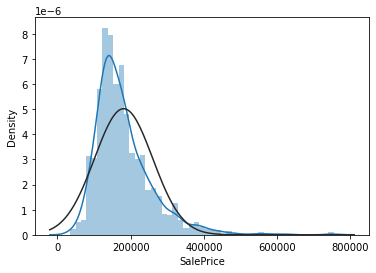

In [4]:
sns.distplot(data['SalePrice'], fit=norm)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

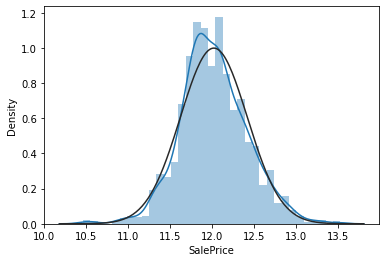

In [5]:
sns.distplot(np.log(data['SalePrice']), fit=norm)

<AxesSubplot:>

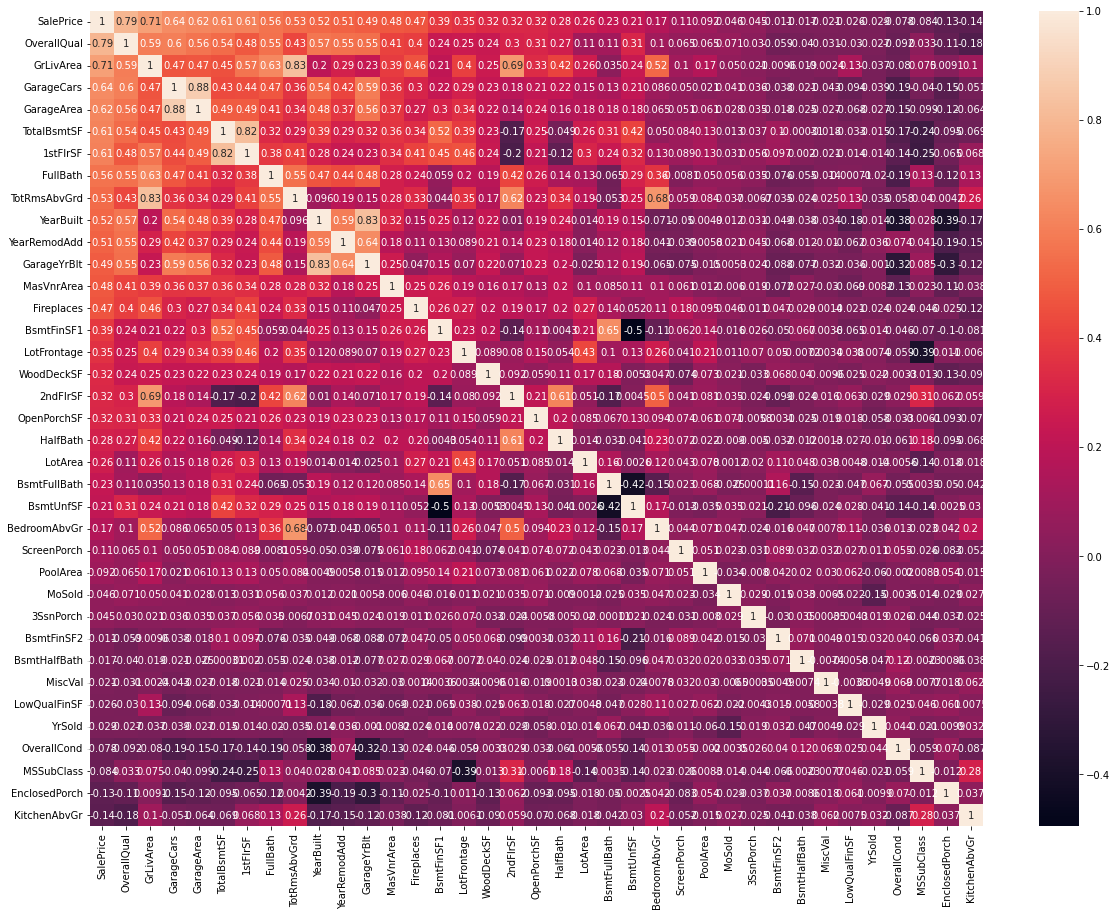

In [6]:
d_corr = data.corr()
top_corr = data[d_corr.nlargest(80, 'SalePrice')['SalePrice'].index].corr()
fig, ax_1 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax_1)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

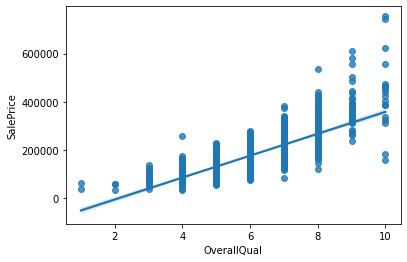

In [7]:
sns.regplot(data['OverallQual'], data['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

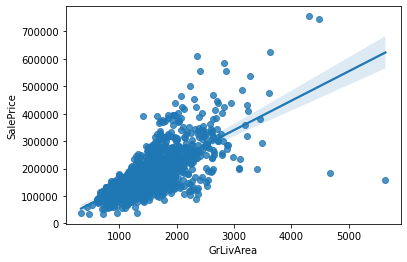

In [8]:
sns.regplot(data['GrLivArea'], data['SalePrice'])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

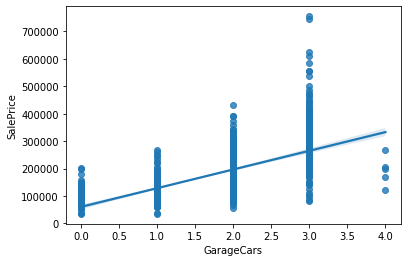

In [9]:
sns.regplot(data['GarageCars'], data['SalePrice'])

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

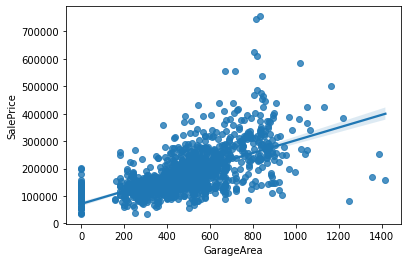

In [10]:
sns.regplot(data['GarageArea'], data['SalePrice'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

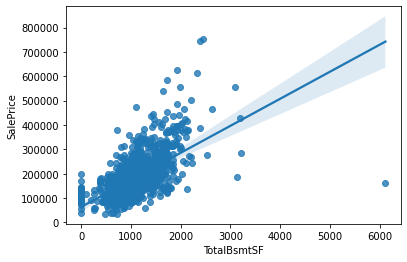

In [11]:
sns.regplot(data['TotalBsmtSF'], data['SalePrice'])

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

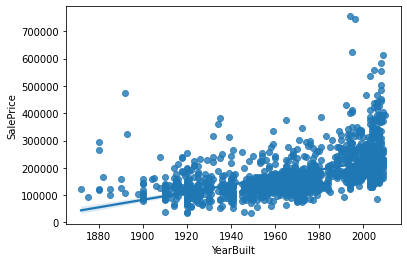

In [12]:
sns.regplot(data['YearBuilt'], data['SalePrice'])

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

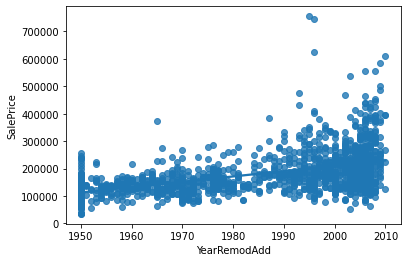

In [13]:
sns.regplot(data['YearRemodAdd'], data['SalePrice'])

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

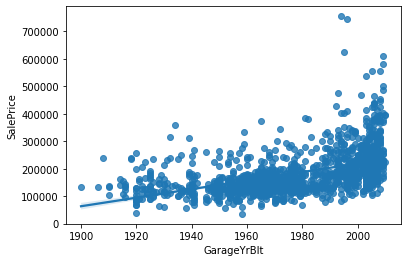

In [14]:
sns.regplot(data['GarageYrBlt'], data['SalePrice'])

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

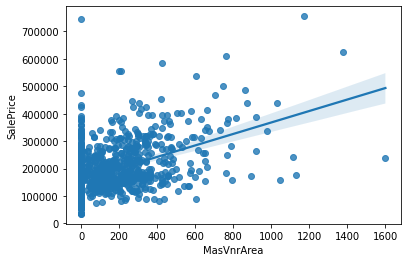

In [15]:
sns.regplot(data['MasVnrArea'], data['SalePrice'])

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

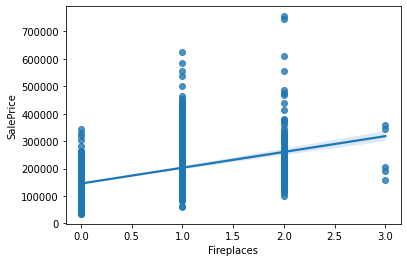

In [16]:
sns.regplot(data['Fireplaces'], data['SalePrice'])

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

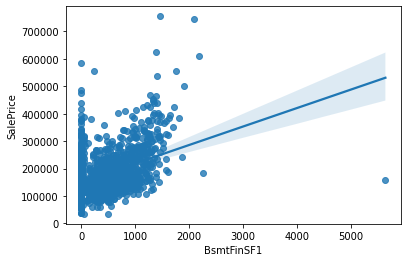

In [17]:
sns.regplot(data['BsmtFinSF1'], data['SalePrice'])

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

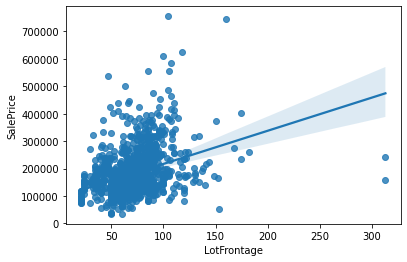

In [18]:
sns.regplot(data['LotFrontage'], data['SalePrice'])

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

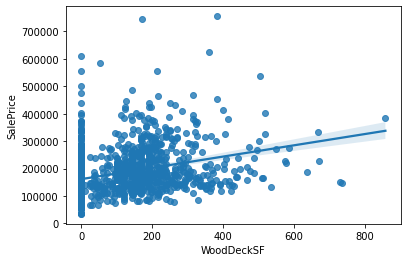

In [19]:
sns.regplot(data['WoodDeckSF'], data['SalePrice'])

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

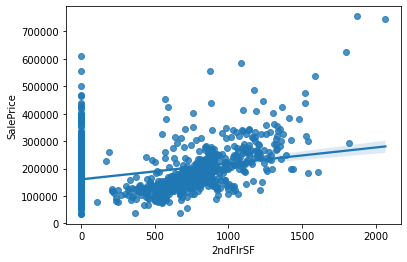

In [20]:
sns.regplot(data['2ndFlrSF'], data['SalePrice'])

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

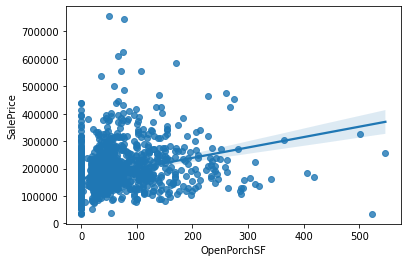

In [21]:
sns.regplot(data['OpenPorchSF'], data['SalePrice'])

<AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>

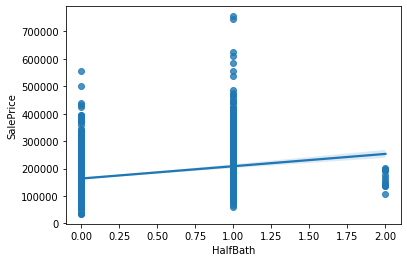

In [22]:
sns.regplot(data['HalfBath'], data['SalePrice'])

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

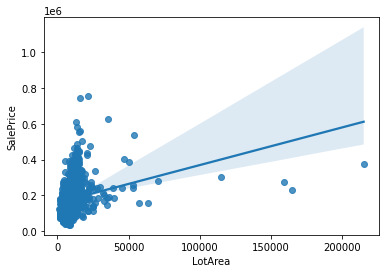

In [23]:
sns.regplot(data['LotArea'], data['SalePrice'])

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

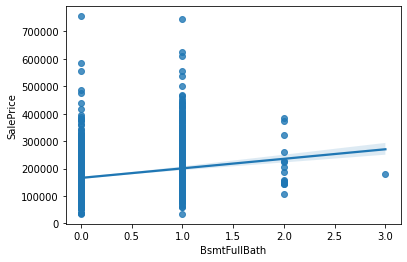

In [24]:
sns.regplot(data['BsmtFullBath'], data['SalePrice'])

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

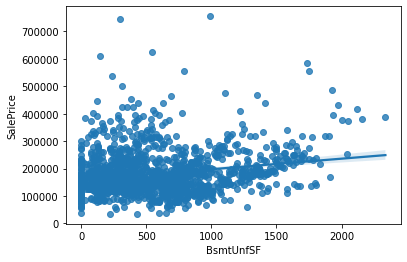

In [25]:
sns.regplot(data['BsmtUnfSF'], data['SalePrice'])

In [26]:
train=train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index) #이상값 삭제

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

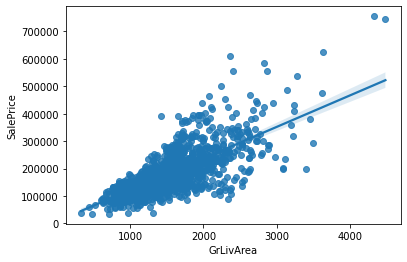

In [27]:
sns.regplot(train['GrLivArea'], train['SalePrice'])

In [28]:
train=train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index) 
train=train.drop(train[(train['GarageArea']<1000) & (train['SalePrice']>700000)].index) 
train=train.drop(train[(train['TotalBsmtSF']>5000) & (train['SalePrice']<300000)].index) 
train=train.drop(train[(train['YearRemodAdd']>1990) & (train['SalePrice']>650000)].index) 
train=train.drop(train[(train['GarageYrBlt']>1980) & (train['SalePrice']>650000)].index) 
train=train.drop(train[(train['MasVnrArea']<1400) & (train['SalePrice']>650000)].index) 
train=train.drop(train[(train['BsmtUnfSF']<1500) & (train['SalePrice']>700000)].index) 

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

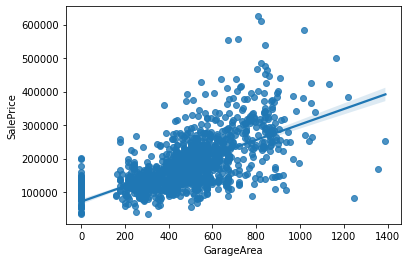

In [29]:
sns.regplot(train['GarageArea'], train['SalePrice'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

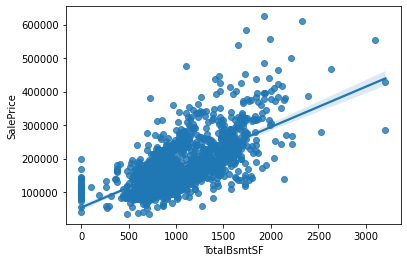

In [30]:
sns.regplot(train['TotalBsmtSF'], train['SalePrice'])

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

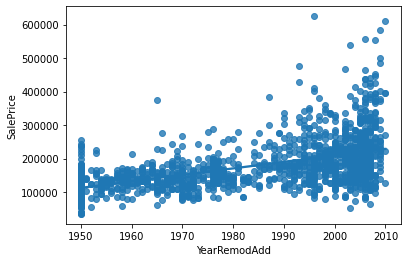

In [31]:
sns.regplot(train['YearRemodAdd'], train['SalePrice'])

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

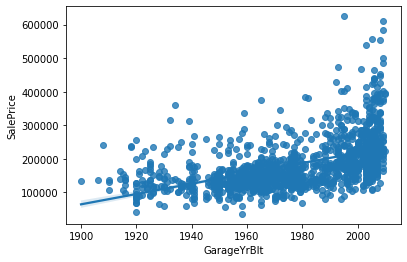

In [32]:
sns.regplot(train['GarageYrBlt'], train['SalePrice'])

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

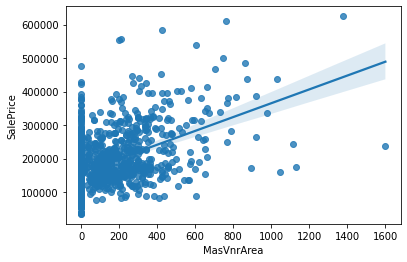

In [33]:
sns.regplot(train['MasVnrArea'], train['SalePrice'])

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

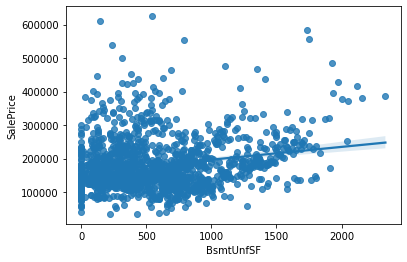

In [34]:
sns.regplot(train['BsmtUnfSF'], train['SalePrice'])

In [37]:
#t_plus 시작 = 임시로 concat 하는
ytrain=train['SalePrice']
train=train[list(test)]
t_pius=pd.concat((train, test), axis=0)
index_t_plus = t_plus.index
print(all_data.shape)
ytrain=np.log(ytrain+1)

KeyError: 'SalePrice'

In [143]:
t_plus.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [144]:
check_null = t_plus.isna().sum() / len(t_plus)
check_null[check_null >=0.5]

Alley          0.932075
PoolQC         0.997256
Fence          0.804460
MiscFeature    0.963979
dtype: float64

In [145]:
remove_cols = check_null[check_null >= 0.5].keys()
t_plus = t_plus.drop(remove_cols, axis=1)
t_plus.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [146]:
check_null = t_plus.isna().sum() / len(t_plus)
check_null[check_null >=0.3]

FireplaceQu    0.487136
dtype: float64

In [147]:
remove_cols = check_null[check_null >= 0.4].keys()
t_plus = t_plus.drop(remove_cols, axis=1)
t_plus.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [148]:
# 값에 가중치 대체하기
obj_t_plus = t_plus.select_dtypes(include='object')
num_t_plus = t_plus.select_dtypes(exclude='object')
print('Object type columns:\n',obj_t_plus.columns)
print('---------------------------------------------------------------------------------')
print('Numeric type columns:\n',num_t_plus.columns)

Object type columns:
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
---------------------------------------------------------------------------------
Numeric type columns:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHa

In [149]:
dummy_t_plus = pd.get_dummies(obj_t_plus, drop_first=True)
dummy_t_plus.index = index_t_plus
dummy_t_plus.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [150]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

In [151]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy= 'mean')
imp_mean.fit(num_t_plus)

SimpleImputer()

In [152]:
imp_mean.transform(num_t_plus)

array([[6.0000e+01, 6.5000e+01, 8.4500e+03, ..., 0.0000e+00, 2.0000e+00,
        2.0080e+03],
       [2.0000e+01, 8.0000e+01, 9.6000e+03, ..., 0.0000e+00, 5.0000e+00,
        2.0070e+03],
       [6.0000e+01, 6.8000e+01, 1.1250e+04, ..., 0.0000e+00, 9.0000e+00,
        2.0080e+03],
       ...,
       [2.0000e+01, 1.6000e+02, 2.0000e+04, ..., 0.0000e+00, 9.0000e+00,
        2.0060e+03],
       [8.5000e+01, 6.2000e+01, 1.0441e+04, ..., 7.0000e+02, 7.0000e+00,
        2.0060e+03],
       [6.0000e+01, 7.4000e+01, 9.6270e+03, ..., 0.0000e+00, 1.1000e+01,
        2.0060e+03]])

In [153]:
num_t_plus = pd.DataFrame(num_t_plus, columns=num_t_plus.columns, index=index_t_plus) 
num_t_plus.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [154]:
#8. Merge numeric_df & dummies_df
t_plus = pd.merge(dummy_t_plus, num_t_plus, left_index=True, right_index=True)
t_plus.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,548.0,0,61,0,0,0,0,0,2,2008
2,0,0,1,0,1,0,0,1,0,0,...,460.0,298,0,0,0,0,0,0,5,2007
3,0,0,1,0,1,0,0,0,0,0,...,608.0,0,42,0,0,0,0,0,9,2008
4,0,0,1,0,1,0,0,0,0,0,...,642.0,0,35,272,0,0,0,0,2,2006
5,0,0,1,0,1,0,0,0,0,0,...,836.0,192,84,0,0,0,0,0,12,2008


In [155]:
#9. Split train & validation & test set
print(train.shape, test.shape)
Xtrain=t_plus[:len(train)]
Xtest=t_plus[len(train):]
print(Xtrain.shape, Xtest.shape)

(1456, 79) (1459, 79)
(1456, 231) (1459, 231)


In [156]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import time
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
model_Lasso= make_pipeline(RobustScaler(), Lasso(alpha =0.000327, random_state=18))

model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00052, l1_ratio=0.70654, random_state=18))

In [106]:
model_Lasso.fit(Xtrain, Ytrain)
Lasso_predictions=model_Lasso.predict(Xtest)
train_Lasso=model_Lasso.predict(Xtrain)

model_ENet.fit(Xtrain, Ytrain)
ENet_predictions=model_ENet.predict(Xtest)
train_ENet=model_ENet.predict(Xtrain)

log_train_predictions = (train_Lasso + train_ENet)/2
train_score=np.sqrt(mean_squared_error(Ytrain, log_train_predictions))
print(f"Scoring with train data : {train_score}")

log_predictions=(Lasso_predictions + ENet_predictions) / 2
predictions=np.exp(log_predictions)-1
submission['SalePrice']=predictions
submission.to_csv('0120.csv')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').